In [44]:
import numpy as np
import pandas as pd
import networkx as nx
from itertools import combinations
from geopy.distance import geodesic
import random
import heapq

import matplotlib.pyplot as plt

In [ ]:
CITIES = pd.read_csv('~/Computational_Intelligence/labs/lab2/cities/italy.csv', header=None, names=['name', 'lat', 'lon'])
DIST_MATRIX = np.zeros((len(CITIES), len(CITIES)))

for c1, c2 in combinations(CITIES.itertuples(), 2):
    DIST_MATRIX[c1.Index, c2.Index] = DIST_MATRIX[c2.Index, c1.Index] = geodesic(
        (c1.lat, c1.lon), (c2.lat, c2.lon)
    ).km

In [46]:
# Calculate median and set up graph edges based on median distance
median = np.median(DIST_MATRIX.reshape(1, -1))
G = nx.Graph()
for c1, c2 in combinations(CITIES.itertuples(), 2):
    G.add_node(c1.Index)
    G.add_node(c2.Index)
    if DIST_MATRIX[c1.Index, c2.Index] <= median:
        G.add_edge(c1.Index, c2.Index, weight=DIST_MATRIX[c1.Index, c2.Index])

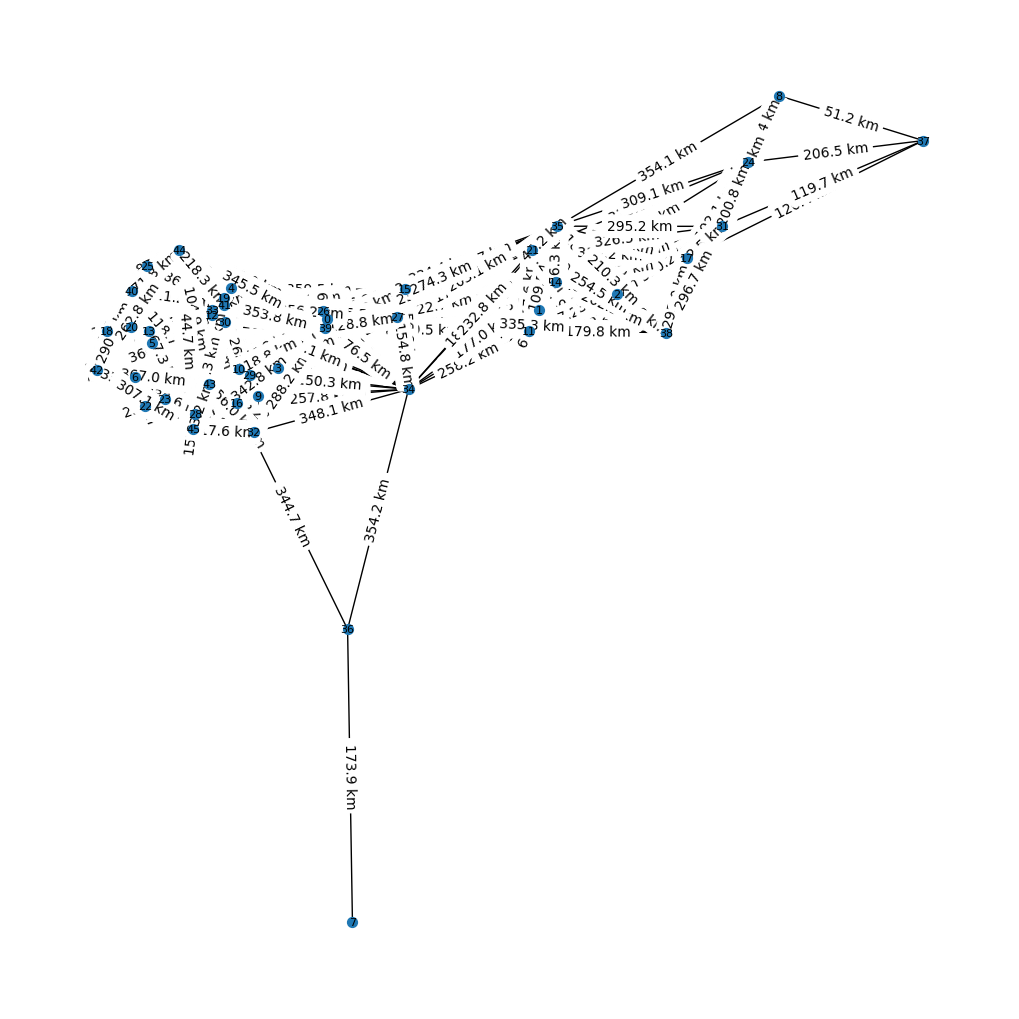

In [47]:
# plot graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Positions nodes with a spring layout for clearer visualization
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.1f} km" for u, v, d in G.edges(data=True)})
plt.show()

## Dijkstra

In [48]:
def dijkstra(graph, start, end):
    # Initialize all distantes to infinity except the start node
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0
    # Priority queue to keep track of the next node with the smallest distance
    priority_queue = [(0, start)]
    # Dictionary to reconstruct the path
    # Key: node, Value: previous node in the shortest path
    predecessors = {node: None for node in graph.nodes}
    
    while priority_queue:
        # Get the node with the smallest distance
        current_distance, current_node = heapq.heappop(priority_queue)
        
        # Early stop if we reached the end node
        if current_node == end:
            break
        
        # Check each neighbor of the current node
        for neighbor in graph.neighbors(current_node):
            edge_weight = graph.edges[current_node, neighbor]['weight']
            distance = current_distance + edge_weight
            
            # Only consider this path if it's better
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))
    
    # Reconstruct path from end to start
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = predecessors[current]
    path.reverse()  # Reverse the path to start -> end
    
    return path, distances[end]


In [49]:
# Select two random cities (using the index of the cvs as node_name)
start_city = random.choice(CITIES.index)
end_city = random.choice(CITIES.index)

# Run Dijkstra's algorithm
path, shortest_distance = dijkstra(G, start_city, end_city)

# Output the results
start_city_name = CITIES.loc[start_city, 'name']
end_city_name = CITIES.loc[end_city, 'name']
print(f"Shortest path from {start_city_name} to {end_city_name}:")
for city_index in path:
    print(CITIES.loc[city_index, 'name'])
print(f"Total distance: {shortest_distance:.2f} km")


Shortest path from Terni to Milan:
Terni
Florence
Milan
Total distance: 426.16 km
